In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pprint 
pp = pprint.PrettyPrinter(indent=4)


# Part 1: Feed forward network from scratch!

For this part, you are not allowed to use any library other than numpy. 

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) for the following neural network:

<img src="nn.png" width=400 height=400/>

The weight matrix for the hidden layer is W1 and has bias b1. 

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is **sigmoid** for both hidden and output layer

Loss function is the MSE loss $$L(y,y_t) = \frac{1}{2N}\sum_{n=1}^{N}(y^n - y_{t}^{n})^2$$

Refer to the below dictionary for dimensions for each matrix

In [2]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)
    
    return Y, Z2, H, Z1

In [5]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.dot(dLdZ2, np.ones(1000))
    
    dLdH = np.dot(dLdZ2.reshape(1000, 1), weights['W2'].reshape((1,3)))
    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(dLdZ1.T, np.ones((1000)))
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [6]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [7]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318688}


You answers should be close to L = 0.133 and 
'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

You can use any library for the following questions.

# Part 2: Fashion MNIST dataset
The Fashion-MNIST dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It's commonly used as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning models. You can read more about the dataset at the [Fashion-MNIST homepage](https://github.com/zalandoresearch/fashion-mnist). 

We will utilize tensorflow to import the dataset, however, feel free to use any framework (TF/PyTorch) to answer the assignment questions.

In [8]:
from tensorflow.keras.datasets import fashion_mnist

# load data
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

2.1 Plot the first 25 samples from both development and test sets on two separate 5$\times $5 subplots. Each image in your subplot should be labelled with the ground truth label. Get rid of the plot axes for a nicer presentation. You should also label your plots to indicate if the plotted data is from development or test set.

In [9]:
# utility function for plotting
def plot_image(image, label, ax, i, j, pred=False, plot_pred=False):
    ax[i][j].imshow(image)
    if plot_pred:
        ax[i][j].set_title(f'GT:{label}, Pred:{pred}')
    else:
        ax[i][j].set_title(f'{label}')
        
    ax[i][j].axis('off')

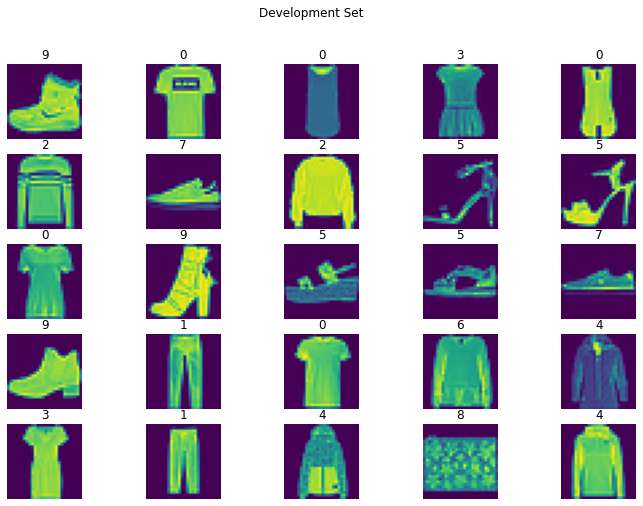

In [10]:
# define the plot
fig, ax = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(w=12,h=8)

# loop over the first 25 dev samples
k = 0
for i in range(5):
    for j in range(5):
        image, label = xdev[k], ydev[k]
        ax[i][j] = plot_image(image, label, ax, i, j, pred=False, plot_pred=False)
        k += 1

fig.suptitle('Development Set');

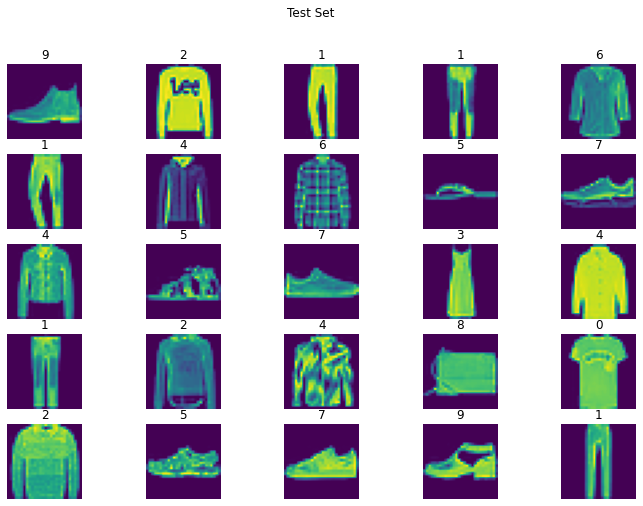

In [11]:
# define the plot
fig, ax = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(w=12,h=8)

# loop over the first 25 test samples
k = 0
for i in range(5):
    for j in range(5):
        image, label = xtest[k], ytest[k]
        ax[i][j] = plot_image(image, label, ax, i, j, pred=False, plot_pred=False)
        k += 1

fig.suptitle('Test Set');

# Part 3: Feed Forward Network

In this part of the homework, we will build and train a deep neural network on the Fashion-MNIST dataset.

### 3.1.1 Print their shapes - $x_\text{dev}, y_{\text{dev}}, x_\text{test}, y_\text{test}$

In [12]:
print(f'xdev: {xdev.shape}')
print(f'ydev: {ydev.shape}')
print(f'xtest: {xtest.shape}')
print(f'ytest: {ytest.shape}')

xdev: (60000, 28, 28)
ydev: (60000,)
xtest: (10000, 28, 28)
ytest: (10000,)


### 3.1.2 Flatten the images into one-dimensional vectors. Again, print out the shapes of $x_\text{dev}, x_\text{test}$

In [13]:
xdev = xdev.reshape(xdev.shape[0], -1)
xtest = xtest.reshape(xtest.shape[0], -1)

print(f'xdev: {xdev.shape}')
print(f'xtest: {xtest.shape}')

xdev: (60000, 784)
xtest: (10000, 784)


### 3.1.3 Standardize the development and test sets. 

Note that the images are 28x28 numpy arrays, and each pixel takes value from 0 to 255.0. 0 means background (white), 255 means foreground (black).

In [14]:
xdev = xdev/255.0
xtest = xtest/255.0

### 3.1.4 Assume your neural network has softmax activation as the last layer activation. Would you consider encoding your target variable? Which encoding would you choose and why? The answer depends on your choice of loss function too, you might want to read 2.2.1 and 2.2.5 before answering this one!

Encode the target variable else provide justification for not doing so. Supporting answer may contain your choice of loss function.


In [15]:
print(f"I'd consider one-hot encoding the target as my last layer activation is softmax \nwhich outputs 10 probabilities corresponding to each class")
print(f"\nAlong with this, my loss function would be categorical_crossentropy \nwhich would expect 10-dimensional vectors to calculate loss.")


I'd consider one-hot encoding the target as my last layer activation is softmax 
which outputs 10 probabilities corresponding to each class

Along with this, my loss function would be categorical_crossentropy 
which would expect 10-dimensional vectors to calculate loss.


In [16]:
from tensorflow import keras

ydev = keras.utils.to_categorical(ydev, 10)
ytest = keras.utils.to_categorical(ytest, 10)

print(ydev.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


### 3.1.5 Train-test split your development set into train and validation sets (8:2 ratio). 

Note that splitting after encoding does not causes data leakage here because we know all the classes beforehand.

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(xdev, ydev, test_size=.2, shuffle=True, random_state=128)

print(xtrain.shape)
print(xval.shape)

(48000, 784)
(12000, 784)


### 3.2.1 Build the feed forward network

Using Softmax activation for the last layer and ReLU activation for every other layer, build the following model:

1. First hidden layer size - 128
2. Second hidden layer size - 64
3. Third and last layer size - You should know this



In [18]:
from keras.models import Sequential
from keras.layers import Dense

input_size = xtrain.shape[1]
output_size = 10

model = keras.Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_size,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(output_size, activation='softmax'))

### 3.2.2 Print out the model summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### 3.2.3 Report the total number of trainable parameters. Do you think this number is dependent on the image height and width? Only Yes/No required. 

In [20]:
print('109,386')
print('Yes')

109,386
Yes


### 3.2.4 Print out your model's output on first train sample. This will confirm if your dimensions are correctly set up. Is the sum of this output equal to 1 upto two decimal places?

In [21]:
p = model(xtrain[0:1]).numpy().reshape(-1,)
print(f'On first train sample: \n{p} \n\nSum: {p.sum():.2f}\n\nYes')

On first train sample: 
[0.07103806 0.05442283 0.12989034 0.09020111 0.25055844 0.08763682
 0.11113399 0.09175431 0.04655832 0.06680575] 

Sum: 1.00

Yes


### 3.2.5 Considering the output of your model and overall objective, what loss function would you choose and why? Choose a metric for evaluation and explain the reason behind your choice.

In [22]:
print(f'I would choose categorical_crossentropy as the output of my model are probabilities \nand this a multi-class classification task')
print(f'\nI would choose accuracy as the evaluation metric because the classes are balanced')


I would choose categorical_crossentropy as the output of my model are probabilities 
and this a multi-class classification task

I would choose accuracy as the evaluation metric because the classes are balanced


### 3.2.6 Using the metric and loss function above, with Adam as the optimizer, train your model for 20 epochs with batch size 128. 

Make sure to print out the values of loss function and metric after each epoch for both train and validation sets.

Note - Use appropriate learning rate for the optimizer, you might have to try different values

In [23]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [24]:
history = model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=20, batch_size=128, shuffle=True)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.5803 - accuracy: 0.7967 - val_loss: 0.4281 - val_accuracy: 0.8492
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4006 - accuracy: 0.8573 - val_loss: 0.3877 - val_accuracy: 0.8632
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3596 - accuracy: 0.8714 - val_loss: 0.3758 - val_accuracy: 0.8595
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3323 - accuracy: 0.8793 - val_loss: 0.3449 - val_accuracy: 0.8771
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3127 - accuracy: 0.8856 - val_loss: 0.3236 - val_accuracy: 0.8842
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2922 - accuracy: 0.8929 - val_loss: 0.3345 - val_accuracy: 0.8772
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.8954 - val_loss: 0.3336 - val_accuracy: 0.8744
Epoch 

### 3.2.7 Plot two separate plots displaying train vs validation loss and train vs validation metric score

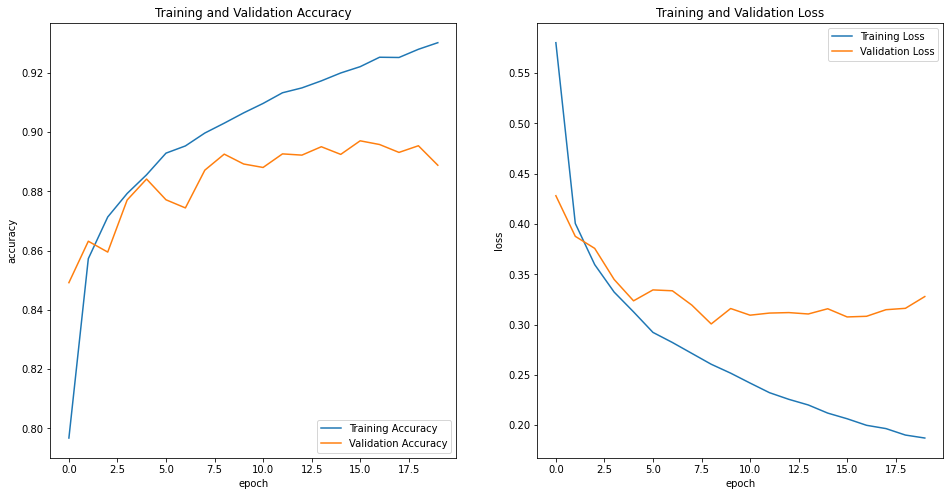

In [25]:
# TODO: Plot accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.show()

### 3.3.1 Print out the metric score on the test set

In [26]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8831


[0.35387980937957764, 0.8830999732017517]

### 3.3.2 Plot confusion matrix on the test set and label the axes appropriately with true and predicted labels. 

Labels on the axes should be the original classes (0-9) and not one-hot-encoded. To achieve this, you might have to reverse transform your model's predictions. Please look into the documentation of your target encoder.

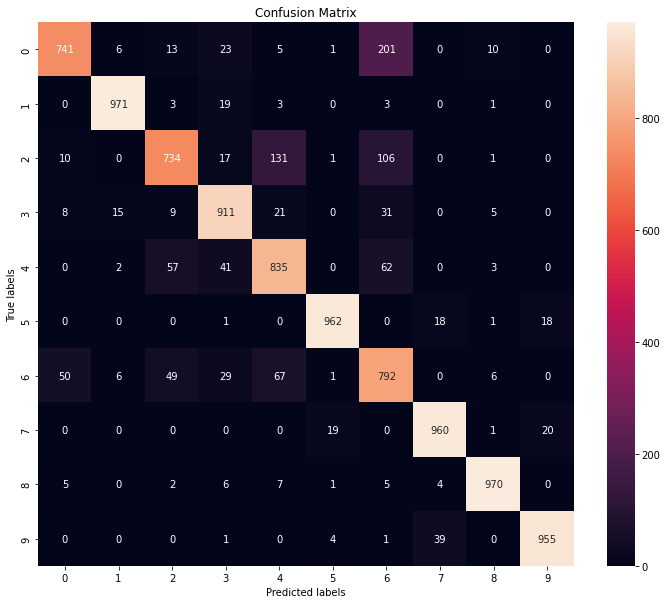

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

p = model.predict(xtest)
CM = confusion_matrix(np.argmax(ytest, axis=1), np.argmax(p, axis=1))

plt.figure(figsize = (12,10))
sns.heatmap(CM, annot = True, annot_kws = {"size": 10}, fmt='d')
plt.ylabel('True labels');
plt.xlabel('Predicted labels');
plt.title('Confusion Matrix');


### 3.3.3 Plot the first 25 samples of test dataset on a 5$\times $5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). 

For example, an image of class 3, with predicted class 7 should have the label GT:3, P:7. Get rid of the plot axes for a nicer presentation.

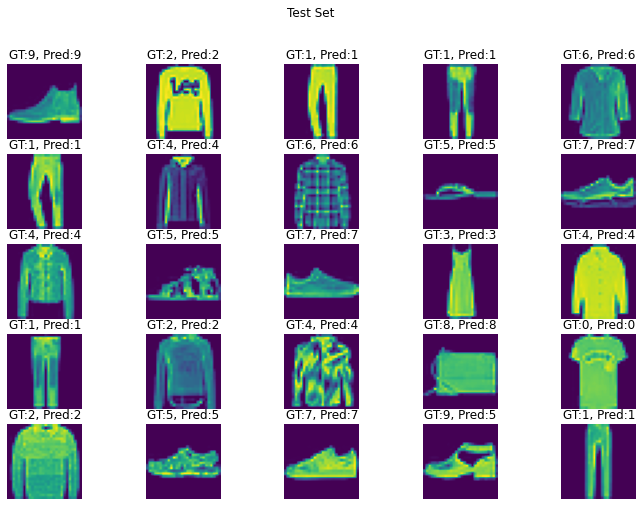

In [28]:
# load data again
(_, _), (xtest, ytest) = fashion_mnist.load_data()

# define the plot
fig, ax = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(w=12,h=8)

# loop over the first 25 test samples
k = 0
for i in range(5):
    for j in range(5):
        image, label = xtest[k], ytest[k]
        pred = np.argmax(p, axis=1)[k]
        ax[i][j] = plot_image(image, label, ax, i, j, pred=pred, plot_pred=True)
        k += 1

fig.suptitle('Test Set');

# Part 4: Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network, LeNet-5, on the Fashion-MNIST dataset. 

In [29]:
from tensorflow.keras.datasets import fashion_mnist

(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 4.1 Preprocess

1. Standardize the datasets

2. Encode the target variable.

3. Split development set to train and validation sets (8:2).

In [30]:
# Standardize the data 
xdev = xdev/255.0
xtest = xtest/255.0

# One-hot encode the labels
ydev = keras.utils.to_categorical(ydev, 10)
ytest = keras.utils.to_categorical(ytest, 10)

# Split
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(xdev, ydev, test_size=.2, shuffle=True, random_state=128)

print(xtrain.shape)
print(xval.shape)

(48000, 28, 28)
(12000, 28, 28)


### 4.2.1 LeNet-5

We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1  padded to yield the same size as input. What's the output dimension of this layer? (6x28x28)
2. Maxpooling layer of 2x2
3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding. What's the output dimension of this layer? (16x10x10)
4. Maxpooling layer of 2x2. What's the output dimension of this layer? (16x5x5)
5. 2D convolutional layer with 120 filters, 5x5 kernel. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!
6. A fully connected layer with 84 units
7. The output layer, with 10 units, each unit representing the probability of image being in that category.

In [31]:
# TODO: build the model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

model = keras.Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=120, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


### 4.2.2 Report layer output

Report the output dimensions of each layers of LeNet-5. **Hint:** You can report them using the model summary function that most frameworks have, or you can calculate and report the output dimensions by hand (It's actually not that hard and it's a good practice too!)

In [32]:
# TODO: report model output dimensions

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)              

### 4.2.3 Model training

Train the model for 10 epochs. In each epoch, record the training loss, training accuracy, testing loss, and testing accuracy. Plot the accuracy and the loss over epochs for train & test sets. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [33]:
# TODO: Train the model
epochs=15
history = model.fit(x=xtrain, y=ytrain, validation_data=(xval, yval),
  # batch_size=32, # 32 is the default; only specify this when using nparray as data input
  epochs=epochs,
  shuffle=True, # This argument is ignored when x is a generator or an object of tf.data.Dataset.
  # validation_split = 0.2, # Fraction of the training data to be used as validation data.
)

Epoch 1/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5377 - accuracy: 0.8038 - val_loss: 0.3991 - val_accuracy: 0.8552
Epoch 2/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3617 - accuracy: 0.8681 - val_loss: 0.3419 - val_accuracy: 0.8762
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3172 - accuracy: 0.8841 - val_loss: 0.3153 - val_accuracy: 0.8873
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2873 - accuracy: 0.8932 - val_loss: 0.2946 - val_accuracy: 0.8919
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2637 - accuracy: 0.9016 - val_loss: 0.2946 - val_accuracy: 0.8957
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2457 - accuracy: 0.9075 - val_loss: 0.3132 - val_accuracy: 0.8892
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2294 - accuracy: 0.9148 - val_loss: 0.2719 - val_accuracy:

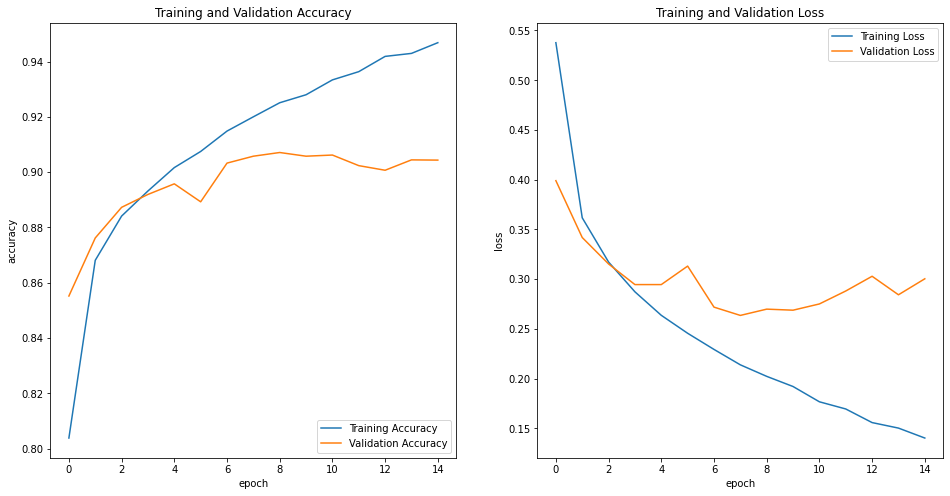

In [34]:
# TODO: Plot accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
# Report model performance on test set
accuracy = model.evaluate(xtest, ytest)
accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8947


[0.33532947301864624, 0.8946999907493591]

What do you see from the plots? Are there signs of overfitting? If so, what are the signs and what techniques can we use to combat overfitting?

Yes. The validation accuracy is dropping and the validation loss is increasing. We can use drop out or batch normalization (or two together)

### 4.3 Overfitting

### 4.3.1 Drop-out

To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.5. Train the model again for 15 epochs, plot the accuracy and loss over trainin epochs. What's your observation?

In [36]:
# TODO: build the model with drop-out layers
from keras.layers import Dropout

model_drop = keras.Sequential()
model_drop.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
# model_drop.add(Dropout(0.5))
model_drop.add(MaxPooling2D(strides=2))
model_drop.add(Dropout(0.5))
model_drop.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
# model_drop.add(Dropout(0.5))
model_drop.add(MaxPooling2D(strides=2))
model_drop.add(Dropout(0.5))
model_drop.add(Conv2D(filters=120, kernel_size=(5,5), padding='valid', activation='relu'))
model_drop.add(Flatten())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(84, activation='relu'))
model_drop.add(Dropout(0.5))
model_drop.add(Dense(10, activation='softmax'))


model_drop.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [37]:
model_drop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)         

In [38]:
# TODO: train the model
epochs=15
history_drop = model_drop.fit(x=xtrain, y=ytrain, validation_data=(xval, yval),
  # batch_size=32, # 32 is the default; only specify this when using nparray as data input
  epochs=epochs,
  shuffle=True, # This argument is ignored when x is a generator or an object of tf.data.Dataset.
  # validation_split = 0.2, # Fraction of the training data to be used as validation data.
  # steps_per_epoch=100
)


Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9793 - accuracy: 0.6405 - val_loss: 0.5658 - val_accuracy: 0.7883
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6818 - accuracy: 0.7480 - val_loss: 0.4985 - val_accuracy: 0.8062
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6273 - accuracy: 0.7666 - val_loss: 0.4702 - val_accuracy: 0.8314
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5990 - accuracy: 0.7787 - val_loss: 0.4439 - val_accuracy: 0.8307
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5766 - accuracy: 0.7892 - val_loss: 0.4345 - val_accuracy: 0.8428
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5646 - accuracy: 0.7934 - val_loss: 0.4203 - val_accuracy: 0.8513
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5466 - accuracy: 0.7981 - val_loss: 0.3974 - val_accuracy:

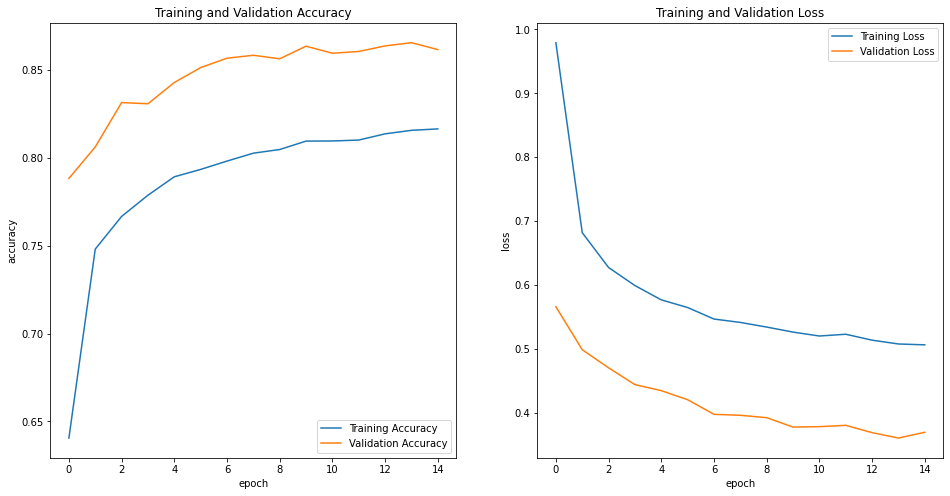

In [39]:
# TODO: Plot accuracy and loss over epochs
acc = history_drop.history['accuracy']
val_acc = history_drop.history['val_accuracy']

loss = history_drop.history['loss']
val_loss = history_drop.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
accuracy = model_drop.evaluate(xtest, ytest)
accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.3842 - accuracy: 0.8560


[0.3841792047023773, 0.8560000061988831]

**What's your observation?**

**ANS:** Validation accuracy is high not dropping. No overfitting is observed.

### 4.3.2 Batch Normalization

This time, let's apply a batch normalization after every hidden layer, train the model for 15 epochs, and report the accuracy and loss over epochs. What have you observed? Compare this technique with dropout, which technique do you think helps with overfitting better?

In [41]:
# TODO: build the model with batch normalization layers
from keras.layers.normalization.batch_normalization import BatchNormalization

model_bn = keras.Sequential()
model_bn.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_bn.add(MaxPooling2D(strides=2))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model_bn.add(MaxPooling2D(strides=2))
model_bn.add(BatchNormalization())
model_bn.add(Conv2D(filters=120, kernel_size=(5,5), padding='valid', activation='relu'))
model_bn.add(Flatten())
model_bn.add(BatchNormalization())
model_bn.add(Dense(84, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(10, activation='softmax'))


model_bn.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [42]:
model_bn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 6)        24        
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                      

In [43]:
# TODO: train the model
epochs=15
history_bn = model_bn.fit(x=xtrain, y=ytrain, validation_data=(xval, yval),
  # batch_size=32, # 32 is the default; only specify this when using nparray as data input
  epochs=epochs,
  shuffle=True, # This argument is ignored when x is a generator or an object of tf.data.Dataset.
  # validation_split = 0.2, # Fraction of the training data to be used as validation data.
  # steps_per_epoch=100
)


Epoch 1/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4223 - accuracy: 0.8491 - val_loss: 0.3375 - val_accuracy: 0.8808
Epoch 2/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3081 - accuracy: 0.8876 - val_loss: 0.3035 - val_accuracy: 0.8908
Epoch 3/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2724 - accuracy: 0.8992 - val_loss: 0.2868 - val_accuracy: 0.8923
Epoch 4/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2455 - accuracy: 0.9093 - val_loss: 0.3046 - val_accuracy: 0.8860
Epoch 5/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2284 - accuracy: 0.9152 - val_loss: 0.2870 - val_accuracy: 0.8942
Epoch 6/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2140 - accuracy: 0.9209 - val_loss: 0.2995 - val_accuracy: 0.8958
Epoch 7/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2005 - accuracy: 0.9247 - val_loss: 0.2700 - val_accuracy:

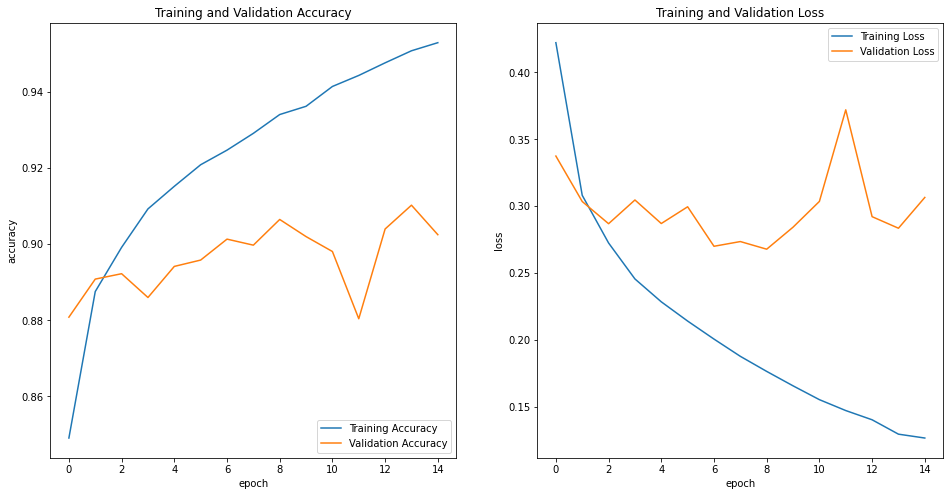

In [44]:
# TODO: plot accuracy and loss over epochs
acc = history_bn.history['accuracy']
val_acc = history_bn.history['val_accuracy']

loss = history_bn.history['loss']
val_loss = history_bn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
accuracy = model_bn.evaluate(xtest, ytest)
accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8992


[0.33622246980667114, 0.8992000222206116]

**Observation, comparison with Dropout:**

**ANS**: There is still a fair amount of overfitting, since the training accuracy increases while the validation accuracy still doesn't improve after hitting 90%. However, it's yielding a higher validation accuracy than dropout, even though dropout's validation accuracy is higher than its training accuracy (hence no overfitting)